In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

# Getting dataframes info for Stocks using yfinance
start_date = '2014-01-01'
end_date = '2024-12-31'

aapl = yf.download('AAPL', start=start_date, end=end_date)
msft = yf.download('MSFT', start=start_date, end=end_date)  
nvda = yf.download('NVDA', start=start_date, end=end_date)   
amzn = yf.download('AMZN', start=start_date, end=end_date)
goog = yf.download('GOOG', start=start_date, end=end_date)
meta = yf.download('META', start=start_date, end=end_date)
tsla = yf.download('TSLA', start=start_date, end=end_date) 
sp500 = yf.download('^GSPC', start=start_date, end=end_date)

list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla, sp500]

print('\n✅ Set up complete!')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


✅ Set up complete!


In [3]:
# Example data aapl
aapl

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-01-02,17.215374,17.336756,17.180827,17.294740,234684800
2014-01-03,16.837212,17.233102,16.820093,17.206959,392467600
2014-01-06,16.929035,17.018359,16.607529,16.727355,412610800
2014-01-07,16.807962,16.992213,16.741981,16.941171,317209200
2014-01-08,16.914404,16.979762,16.765945,16.769678,258529600
...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700


### Closing Price

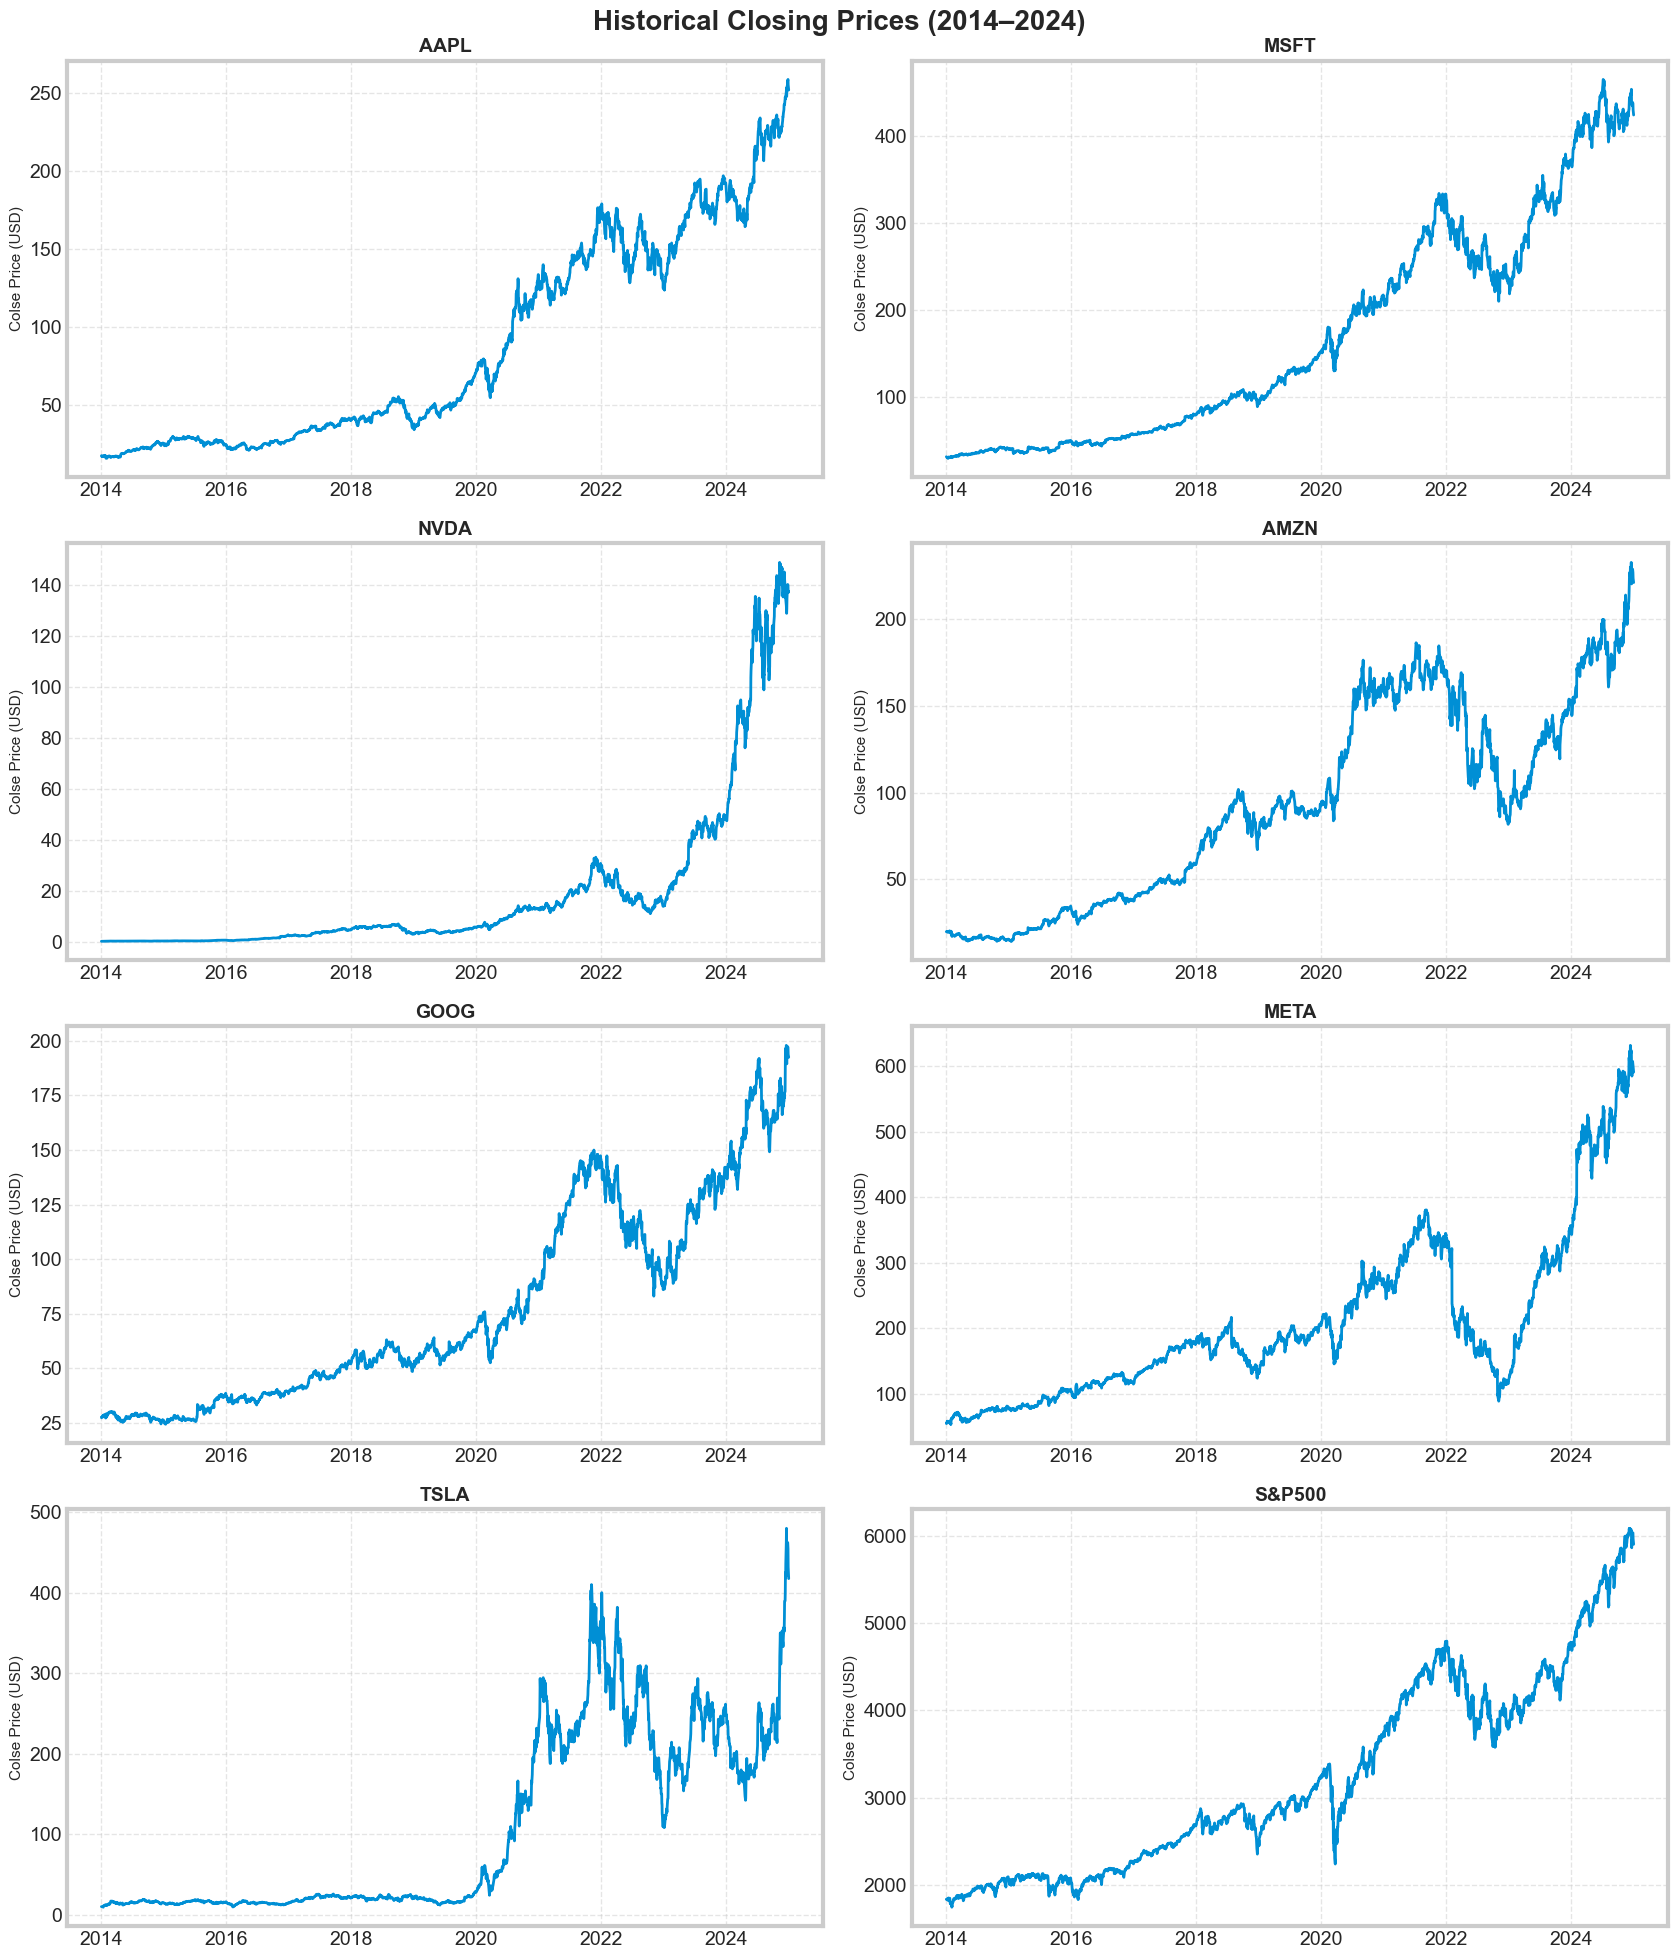

In [7]:
# Historical view of the closing price
sns.set_style("whitegrid")

stock_names = ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'GOOG', 'META', 'TSLA', 'S&P500']
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla, sp500]

plt.figure(figsize=(17, 20))
plt.suptitle('Historical Closing Prices (2014–2024)', fontsize=20, fontweight='bold')
plt.subplots_adjust(hspace=0.4)

for i, (df, name) in enumerate(zip(list_stocks, stock_names), 1):
    plt.subplot(4, 2, i)
    plt.plot(df['Close'], linewidth=2)
    plt.title(f'{name}', fontsize=14, fontweight='bold')
    plt.ylabel('Colse Price (USD)', fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Moving average of the various stocks

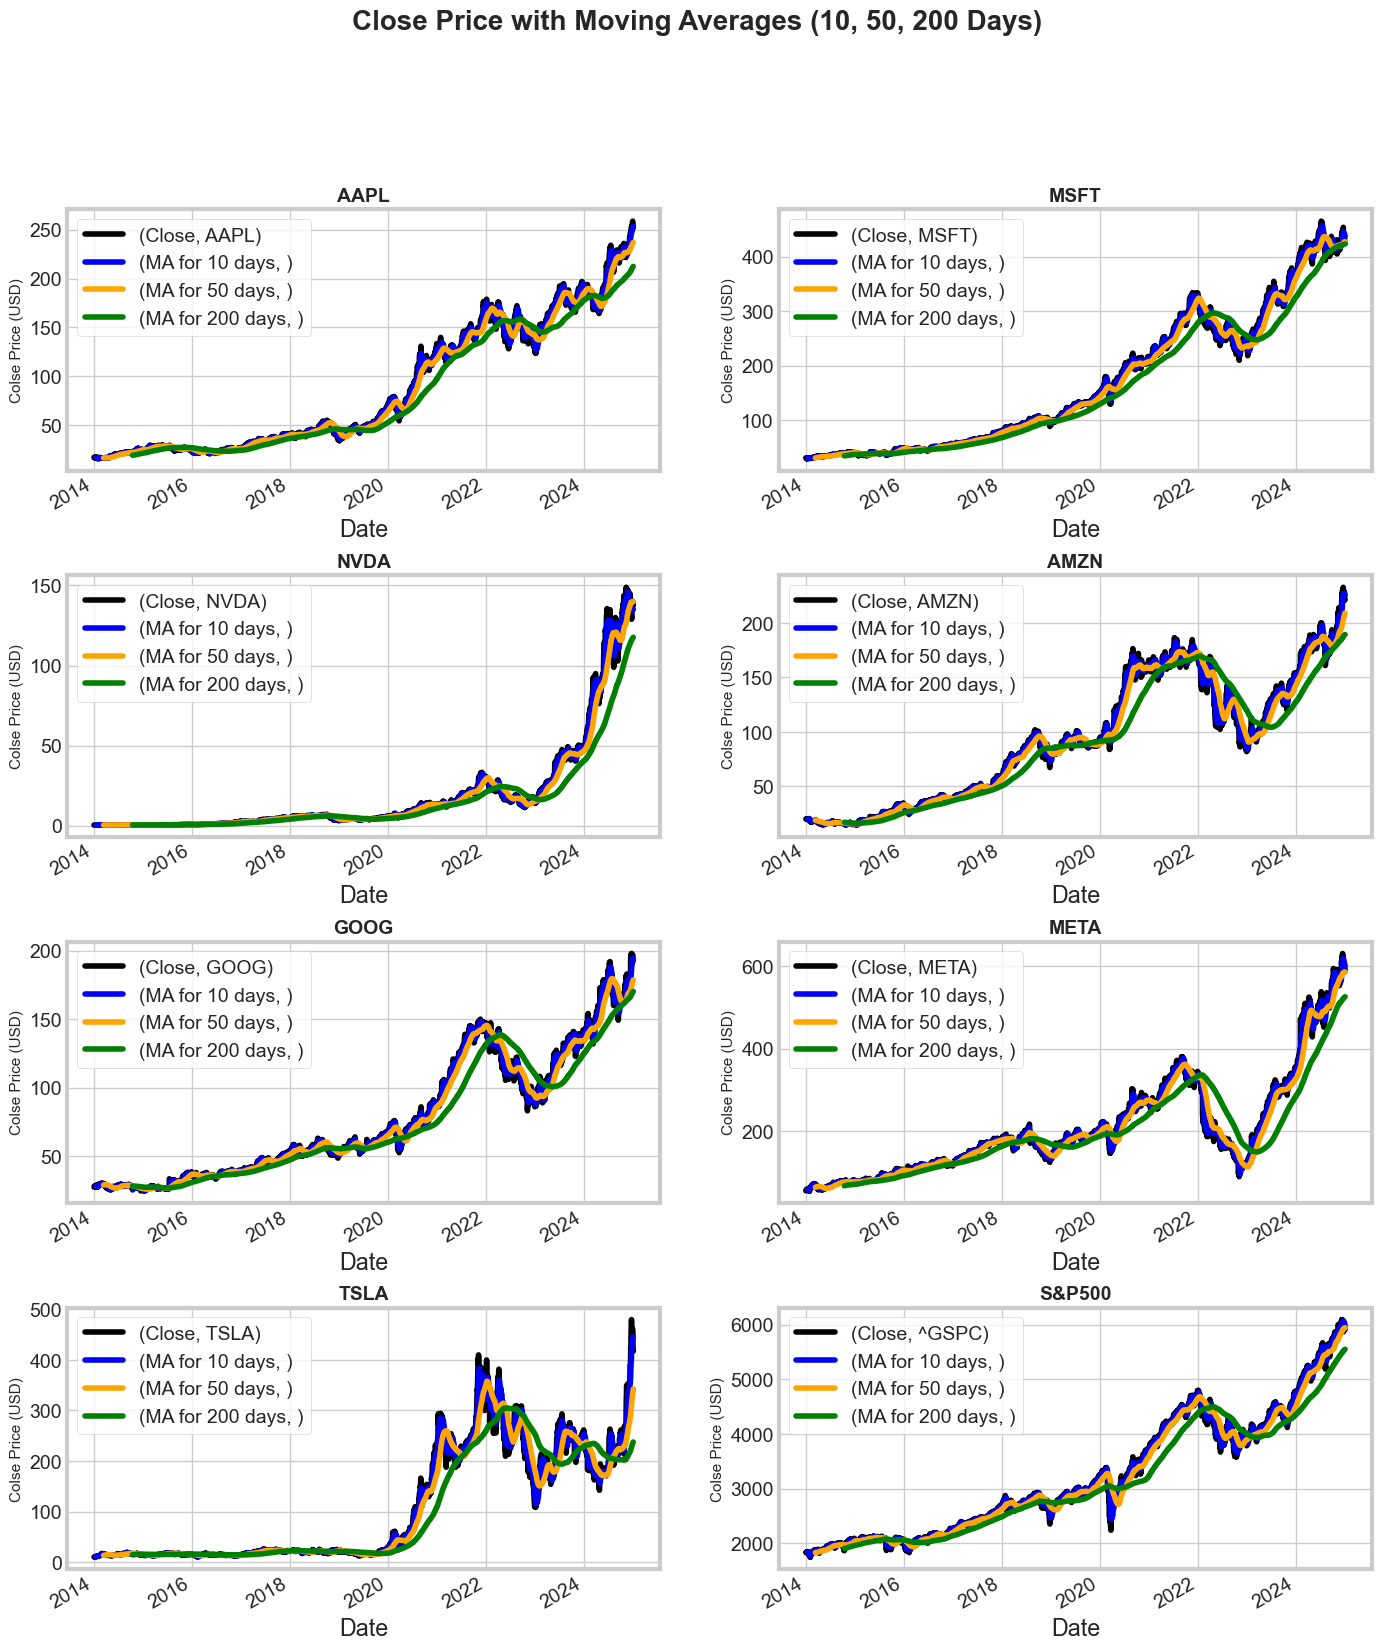

In [10]:
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla, sp500]
stock_names = ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'GOOG', 'META', 'TSLA', 'S&P500']

# Cal Moving Averages
ma_days = [10, 50, 200]
for company in list_stocks:
    for ma in ma_days:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(window=ma).mean()

sns.set_style("whitegrid")
colors = ['black', 'blue', 'orange', 'green'] 

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Close Price with Moving Averages (10, 50, 200 Days)', fontsize=20, fontweight='bold')
fig.subplots_adjust(hspace=0.4, wspace=0.2)

# Plot graph
for ax, company, name in zip(axes.flat, list_stocks, stock_names):
    company[['Close', 'MA for 10 days', 'MA for 50 days', 'MA for 200 days']].plot(ax=ax, color=colors)
    ax.set_title(name, fontsize=14, fontweight='bold')
    ax.set_ylabel('Colse Price (USD)', fontsize=11)
    ax.legend(loc='upper left', fontsize=14)
    ax.grid(True)
plt.show()

### Predicting the closing price stock price using LSTM

In [17]:
start_date = '2014-01-01'
end_date = '2024-12-31'

aapl_df = yf.download('AAPL', start=start_date, end=end_date)
msft_df = yf.download('MSFT', start=start_date, end=end_date)  
nvda_df = yf.download('NVDA', start=start_date, end=end_date)   
amzn_df = yf.download('AMZN', start=start_date, end=end_date)
goog_df = yf.download('GOOG', start=start_date, end=end_date)
meta_df = yf.download('META', start=start_date, end=end_date)
tsla_df = yf.download('TSLA', start=start_date, end=end_date) 
sp500_df = yf.download('^GSPC', start=start_date, end=end_date)

print('\n✅ Set up complete!')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


✅ Set up complete!


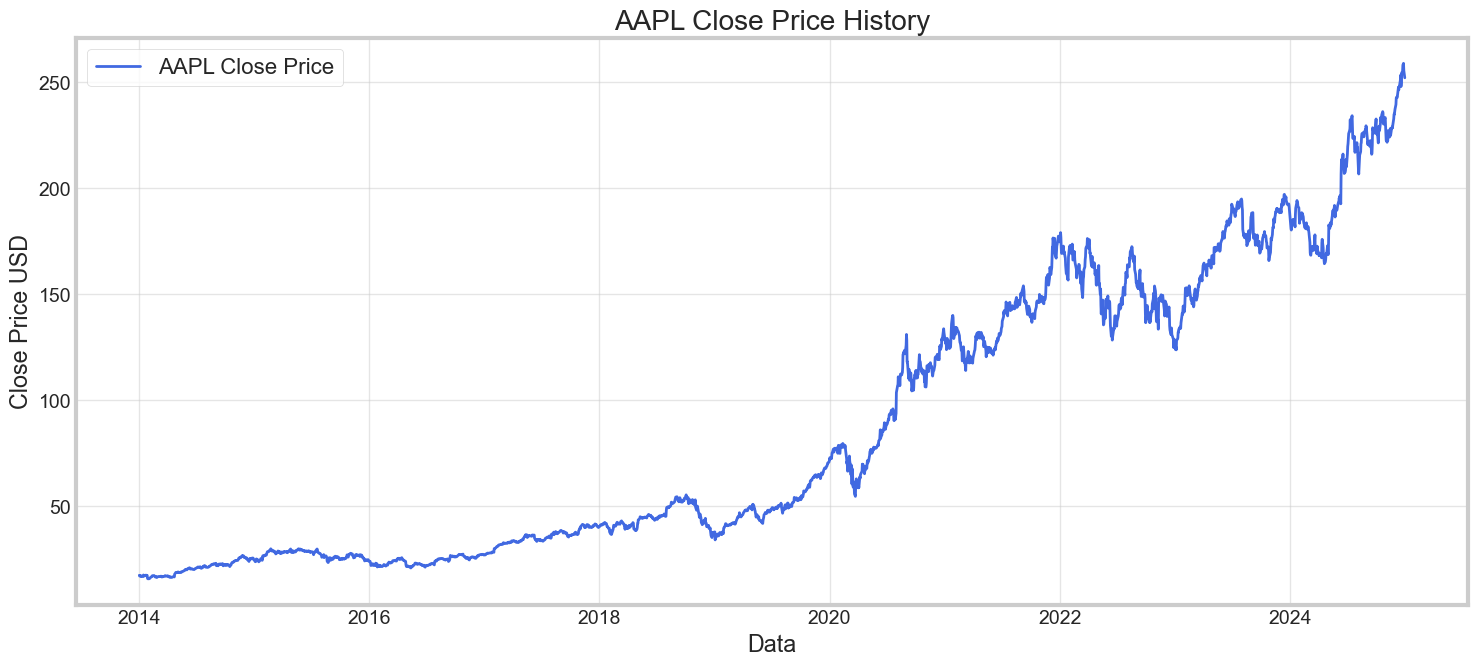

In [43]:
plt.figure(figsize=(16,7))
plt.title('AAPL Close Price History')
plt.plot(aapl_df['Close'], color='royalblue', linewidth=2, label='AAPL Close Price')
plt.legend(fontsize=16)
plt.grid(True, alpha=0.5)
plt.xlabel('Data')
plt.ylabel('Close Price USD')
plt.show()

In [45]:
# Create a new dataframe with only the 'Close column 
data = aapl_df['Close']
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset)*0.95))

print(f"Total amount of data : {len(dataset)}")
print(f"Amount of data for training set (95%) : {training_data_len}")

Total amount of data : 2767
Amount of data for training set (95%) : 2629


In [15]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00682804],
       [0.00527301],
       [0.00565056],
       ...,
       [1.        ],
       [0.98591085],
       [0.9719859 ]])

In [108]:
len(scaled_data[0:int(training_data_len), :])

2629

In [111]:
# Create the training data set 
train_data = scaled_data[0:int(training_data_len), :] # train_data = 2629 Rows

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(f'x_train : {x_train}')
        print(f'y_train : {y_train}')
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

x_train : [array([0.00682804, 0.00527301, 0.00565056, 0.0051527 , 0.00559042,
       0.00470217, 0.00424403, 0.00460109, 0.0059654 , 0.00736942,
       0.00697137, 0.00523332, 0.00630842, 0.00662068, 0.00721839,
       0.00592445, 0.00649141, 0.00086008, 0.00012414, 0.        ,
       0.00010494, 0.000224  , 0.00115315, 0.0016395 , 0.00202192,
       0.00294504, 0.00414372, 0.00504114, 0.00503598, 0.00613164,
       0.006075  , 0.0063325 , 0.00522266, 0.00442181, 0.00366219,
       0.00395833, 0.00325146, 0.00264507, 0.00397377, 0.00378964,
       0.00398537, 0.00443341, 0.0045776 , 0.00437032, 0.0043304 ,
       0.00439219, 0.00505784, 0.0051248 , 0.00435746, 0.0035901 ,
       0.00385405, 0.00445401, 0.00443599, 0.00410636, 0.00464327,
       0.00545694, 0.00620374, 0.00553294, 0.00523425, 0.00515699])]
y_train : [0.005141515120015816]

x_train : [array([0.00682804, 0.00527301, 0.00565056, 0.0051527 , 0.00559042,
       0.00470217, 0.00424403, 0.00460109, 0.0059654 , 0.00736942,
    

train_data คือข้อมูลที่ใช้สำหรับฝึก (training set) ซึ่งจะมีขนาดตามที่กำหนด

x_train จะเก็บข้อมูลที่ใช้ในการฝึกโมเดล (features หรือ input) ซึ่งเป็นลำดับข้อมูลในช่วงเวลาต่างๆ

y_train จะเก็บค่าผลลัพธ์ที่เราต้องการทำนาย (label หรือ target) ซึ่งในกรณีนี้คือราคาปิดในวันถัดไป

ใช้ for loop เพื่อไปที่แต่ละบรรทัดในข้อมูล train_data ตั้งแต่ index 60 (หมายถึงการเริ่มต้นที่ข้อมูลที่ 60) ในแต่ละรอบของ loop, x_train จะเก็บข้อมูล 60 วันก่อนหน้า (คือข้อมูลในช่วง train_data[i-60:i, 0]) ซึ่งใช้เป็น input หรือ feature ,y_train จะเก็บราคาปิดในวันที่ i (คือ train_data[i, 0]) ซึ่งเป็นผลลัพธ์ที่เราต้องการทำนาย
ข้อมูลใน x_train เป็นข้อมูลลำดับเวลา (time series) ที่มีขนาด 60 วัน

โมเดล LSTM ต้องการข้อมูลในรูปแบบสามมิติ: (number of samples, number of time steps, number of features)
x_train.shape[0] คือจำนวนตัวอย่าง (samples), x_train.shape[1] คือจำนวนวัน (time steps), และ 1 คือจำนวนฟีเจอร์ (features) ในแต่ละวัน ซึ่งในที่นี้มีแค่คอลัมน์เดียวคือราคาปิด (Close)
การ reshaping ช่วยให้ข้อมูลใน x_train อยู่ในรูปแบบที่เหมาะสมกับโมเดล LSTM

### Modeling

In [25]:
from keras.models import Sequential
from keras.layers import Dense , LSTM

# Build the LSTM model
model_LSTM = Sequential()
model_LSTM.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_LSTM.add(LSTM(64, return_sequences=False))
model_LSTM.add(Dense(25))
model_LSTM.add(Dense(1))

# Compile the model
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_LSTM.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2569/2569 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - loss: 0.0026


In [29]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model_LSTM.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse # ยิ่ง RMSE น้อย → โมเดลยิ่งทำนายได้แม่น

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


4.719151589461862

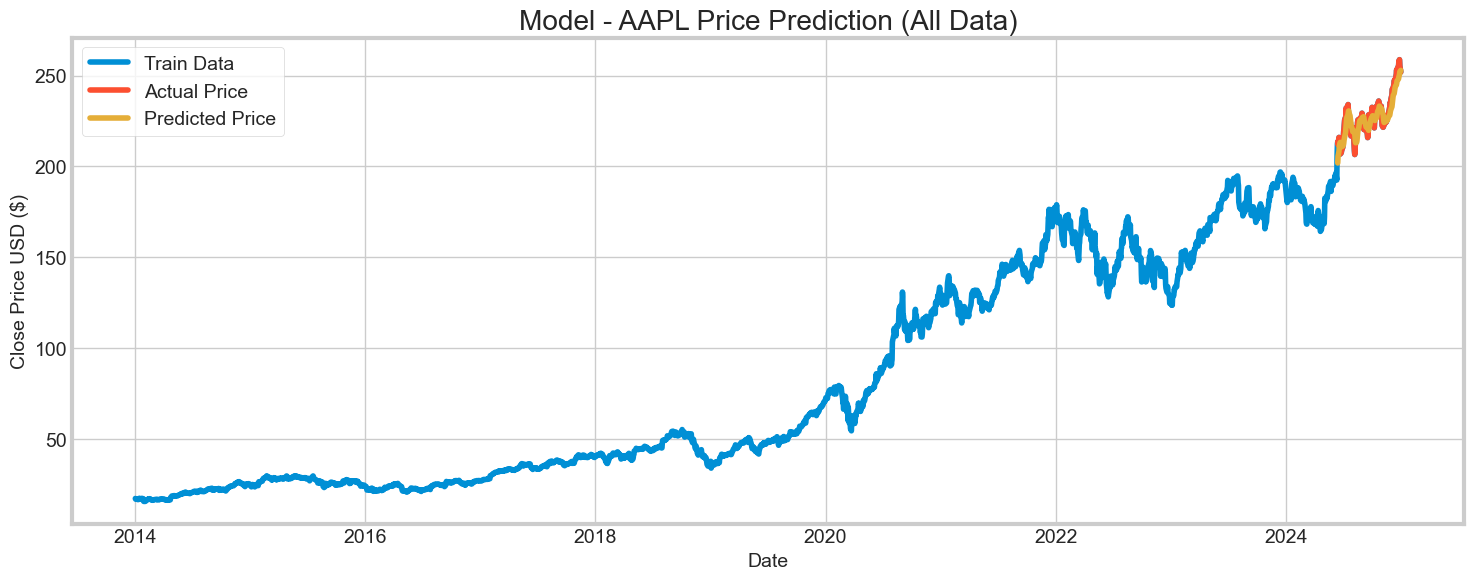

In [104]:
# Plot the data
valid = aapl_df[training_data_len:].copy()  
valid.loc[:, 'Predictions'] = predictions 

# Visualize the data
# Model - AAPL Price Prediction (All Data)
plt.figure(figsize=(16, 6))
plt.title('Model - AAPL Price Prediction (All Data)')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.plot(aapl_df['Close'], label='Actual Price')  # กราฟราคาจริงทั้งหมด
plt.plot(valid[['Close', 'Predictions']], linestyle='-')  # กราฟช่วง test ที่มี prediction
plt.legend(['Train Data', 'Actual Price', 'Predicted Price'])
plt.grid(True)
plt.show()

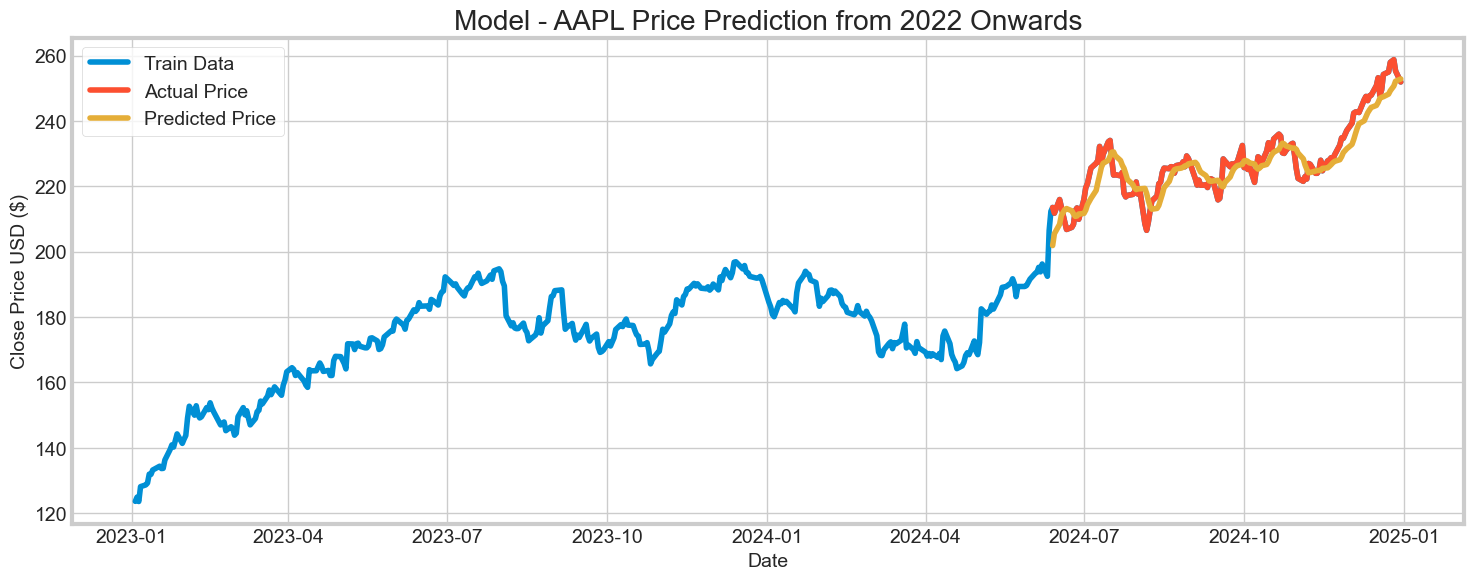

In [102]:
# Model - AAPL Price Prediction from 2023
aapl_df_2022 = aapl_df.loc['2023-01-01':] 
valid_2022 = valid.loc['2023-01-01':]

plt.figure(figsize=(16, 6))
plt.plot(aapl_df_2022['Close'], label='Actual Price')  # กราฟราคาจริงทั้งหมด
plt.plot(valid_2022[['Close', 'Predictions']], linestyle='-')  
plt.legend(['Train Data', 'Actual Price', 'Predicted Price'])

plt.title('Model - AAPL Price Prediction from 2022 Onwards')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.grid(True)
plt.show()

In [67]:
valid[['Close','Predictions']]

Price,Close,Predictions
Ticker,AAPL,
Date,,
2024-06-13,213.522369,201.874542
2024-06-14,211.778229,205.504456
2024-06-17,215.944229,208.372711
2024-06-18,213.572189,211.086517
2024-06-20,208.977646,212.857712
...,...,...
2024-12-23,254.989655,248.208115
2024-12-24,257.916443,249.241943
